In [234]:
import pandas as pd

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Linhas e Colunas

In [235]:
df = pd.read_excel("2020_08_11_Sis_editais.xlsx")
print(f"Linhas disponiveis: {len(df)}")
print(f"No de Features: {len(df.columns)}")
df.head()

Linhas disponiveis: 13872
No de Features: 20


,idEditais,autuado,nrEdital,anoEdital,siglaLicitante,nomeLicitante,dtPublicacao,nrDodf,anoDodf,dtAbertura,modalidadeLicitacao,vrEstimado,prazo,prazoAbertura,tpPrazo,ementaObj,descObjeto,nrgdf,anogdf,classifObjeto
0,1,NÃO,4,2013,NOVACAP,Companhia Urbanizadora da Nova Capital do Brasil,2013-03-05,46.0,2013.0,2013-04-09 00:00:00,CONCORRÊNCIA,2024613.21,270.0,24.0,DIAS,LIMPEZA BR-060 SAMAMBAIA,AVISO DE LICITAÇÃO\r\nConcorrência nº 04/2013 ...,NaN,NaN,SERVIÇOS DE ENGENHARIA (OUTROS)
1,2,NÃO,56,2013,CEB,Companhia Energética de Brasília,2013-03-01,44.0,2013.0,2013-03-15 00:00:00,PREG?O ELETR?NICO,904333.34,12.0,10.0,MESES,AQUISIÇÃO BANCO DE DADOS ORACLE,Aquisição de infraestrutura de servidores\r\nd...,NaN,NaN,AQUISIÇÃO (OUTROS)
2,3,NÃO,16,2012,SEE,Secretaria de Estado de Educação,2013-03-04,45.0,2013.0,2013-03-14 00:00:00,PREG?O ELETR?NICO,106400.00,NaN,8.0,DIAS,CONTRATAÇÃO MINISTRAR CURSOS,Contratação por demanda de empresa especializa...,NaN,NaN,AQUISIÇÃO (OUTROS)
3,4,NÃO,10,2012,SEE,Secretaria de Estado de Educação,2013-03-04,45.0,2013.0,2013-04-04 00:00:00,CONCORRÊNCIA,4084138.25,NaN,22.0,DIAS,COBERTURAS DE QUADRAS POLIESPORTIVAS,CONCORRÊNCIA Nº 10/2012.\r\nA COMISSÃO PERMANE...,NaN,NaN,OBRA DE ENGENHARIA (OUTROS)
4,5,NÃO,10,2013,SEAGRI,"Secretaria de Estado da Agricultura, Abastecim...",2013-04-01,66.0,2013.0,2013-04-15 00:00:00,PREG?O ELETR?NICO,20353.48,12.0,9.0,MESES,CAPACITAÇÃO FUNCIONAL,Contratação de serviços de entidade sem fins l...,NaN,NaN,SERVIÇOS (OUTROS)


In [236]:
df.describe()

,idEditais,nrEdital,anoEdital,nrDodf,anoDodf,vrEstimado,prazo,prazoAbertura,nrgdf,anogdf
count,13872.000000,13872.000000,13872.000000,13855.000000,13853.000000,1.280900e+04,295.000000,13764.000000,5.250000e+02,525.000000
mean,8585.343714,110.887543,2016.211073,159.458318,2016.235472,4.921150e+06,103.433898,12.676765,9.776937e+07,2013.754286
std,5687.852671,194.027073,2.374467,2330.902853,2.556408,7.620083e+07,170.376019,9.419791,1.048258e+08,2.574576
min,1.000000,1.000000,1950.000000,1.000000,1951.000000,-1.506042e+04,3.000000,1.000000,3.000000e+00,1960.000000
25%,3636.750000,14.000000,2014.000000,73.000000,2014.000000,6.743636e+04,12.000000,9.000000,5.300220e+07,2014.000000
50%,7137.500000,43.000000,2016.000000,131.000000,2016.000000,3.095546e+05,24.000000,11.000000,6.000969e+07,2014.000000
75%,14595.250000,137.000000,2018.000000,191.000000,2018.000000,1.736528e+06,120.000000,14.000000,9.300005e+07,2014.000000
max,18087.000000,5920.000000,2020.000000,271120.000000,2044.000000,6.166652e+09,1555.000000,714.000000,5.100010e+08,2031.000000


In [237]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13872 entries, 0 to 13871
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   idEditais            13872 non-null  int64         
 1   autuado              13872 non-null  object        
 2   nrEdital             13872 non-null  int64         
 3   anoEdital            13872 non-null  int64         
 4   siglaLicitante       13833 non-null  object        
 5   nomeLicitante        13833 non-null  object        
 6   dtPublicacao         13864 non-null  datetime64[ns]
 7   nrDodf               13855 non-null  float64       
 8   anoDodf              13853 non-null  float64       
 9   dtAbertura           13817 non-null  object        
 10  modalidadeLicitacao  13720 non-null  object        
 11  vrEstimado           12809 non-null  float64       
 12  prazo                295 non-null    float64       
 13  prazoAbertura        13764 non-

## Frequencia dos atributos na base

In [238]:
for id in df.columns:
    print(id)
    total = len(df)
    aparicoes = df[id].count()
    print(f"Instancias sem N/A: {aparicoes}")
    print(f"Frequencia de aparição: {(aparicoes/total)*100}%\n")

idEditais
Instancias sem N/A: 13872
Frequencia de aparição: 100.0%

autuado
Instancias sem N/A: 13872
Frequencia de aparição: 100.0%

nrEdital
Instancias sem N/A: 13872
Frequencia de aparição: 100.0%

anoEdital
Instancias sem N/A: 13872
Frequencia de aparição: 100.0%

siglaLicitante
Instancias sem N/A: 13833
Frequencia de aparição: 99.71885813148789%

nomeLicitante
Instancias sem N/A: 13833
Frequencia de aparição: 99.71885813148789%

dtPublicacao
Instancias sem N/A: 13864
Frequencia de aparição: 99.94232987312573%

nrDodf
Instancias sem N/A: 13855
Frequencia de aparição: 99.87745098039215%

anoDodf
Instancias sem N/A: 13853
Frequencia de aparição: 99.86303344867359%

dtAbertura
Instancias sem N/A: 13817
Frequencia de aparição: 99.60351787773934%

modalidadeLicitacao
Instancias sem N/A: 13720
Frequencia de aparição: 98.9042675893887%

vrEstimado
Instancias sem N/A: 12809
Frequencia de aparição: 92.33708189158017%

prazo
Instancias sem N/A: 295
Frequencia de aparição: 2.1265859284890425%

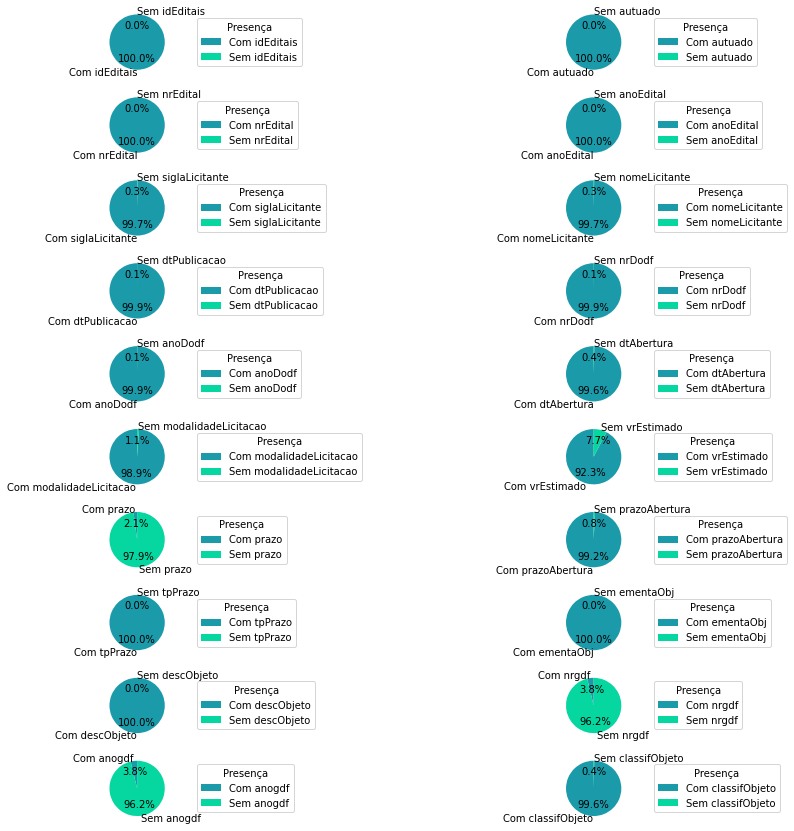

In [239]:
_, ax = plt.subplots(10, 2, figsize=(15,15))
cor = ['#1b9aaa', '#06d6a0']

i = 0
for id in df.columns:
    total = len(df)
    aparicoes = df[id].count()
    labels = ["Com " + str(id), "Sem " + str(id)]
    size = [aparicoes, total - aparicoes]
    ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
    ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    ax[math.floor(i/2), i%2].axis('off')
    i+=1

plt.show()

## Valores Quantitativos e Qualitativos

In [240]:
for id in df.columns:
    print(id)
    print(f"Numero de atributos diferentes: {df[id].nunique()}\n")

idEditais
Numero de atributos diferentes: 13872

autuado
Numero de atributos diferentes: 2

nrEdital
Numero de atributos diferentes: 913

anoEdital
Numero de atributos diferentes: 14

siglaLicitante
Numero de atributos diferentes: 76

nomeLicitante
Numero de atributos diferentes: 78

dtPublicacao
Numero de atributos diferentes: 1908

nrDodf
Numero de atributos diferentes: 299

anoDodf
Numero de atributos diferentes: 22

dtAbertura
Numero de atributos diferentes: 2007

modalidadeLicitacao
Numero de atributos diferentes: 10

vrEstimado
Numero de atributos diferentes: 12195

prazo
Numero de atributos diferentes: 46

prazoAbertura
Numero de atributos diferentes: 74

tpPrazo
Numero de atributos diferentes: 2

ementaObj
Numero de atributos diferentes: 11687

descObjeto
Numero de atributos diferentes: 13856

nrgdf
Numero de atributos diferentes: 515

anogdf
Numero de atributos diferentes: 12

classifObjeto
Numero de atributos diferentes: 21



In [241]:
df = df.convert_dtypes()
df['autuado'] = pd.Categorical(df.autuado)
df['anoEdital'] = pd.Categorical(df.anoEdital)
df['anoDodf'] = pd.Categorical(df.anoDodf)
df['modalidadeLicitacao'] = pd.Categorical(df.modalidadeLicitacao)
df['tpPrazo'] = pd.Categorical(df.tpPrazo)
df['anogdf'] = pd.Categorical(df.anogdf)
df['siglaLicitante'] = pd.Categorical(df.siglaLicitante)
df['classifObjeto'] = pd.Categorical(df.classifObjeto)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13872 entries, 0 to 13871
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   idEditais            13872 non-null  Int64         
 1   autuado              13872 non-null  category      
 2   nrEdital             13872 non-null  Int64         
 3   anoEdital            13872 non-null  category      
 4   siglaLicitante       13833 non-null  category      
 5   nomeLicitante        13833 non-null  string        
 6   dtPublicacao         13864 non-null  datetime64[ns]
 7   nrDodf               13855 non-null  Int64         
 8   anoDodf              13853 non-null  category      
 9   dtAbertura           13817 non-null  object        
 10  modalidadeLicitacao  13720 non-null  category      
 11  vrEstimado           12809 non-null  float64       
 12  prazo                295 non-null    Int64         
 13  prazoAbertura        13764 non-

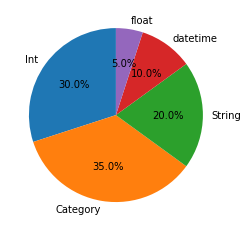

In [242]:
_, ax = plt.subplots()
labels = ["Int", "Category", "String", "datetime", "float"]
size = [6, 7, 4, 2, 1]
ax.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

# Coluna - Autuado

NÃO    12520
SIM     1352
Name: autuado, dtype: int64


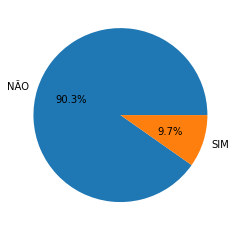

In [243]:
col = df["autuado"]
values = col.value_counts()
print(values)
_, ax = plt.subplots()
labels = ["Nao", "Sim",]
ax.pie(values, labels=values.keys(), autopct='%1.1f%%')
plt.show()

# Coluna - Numero Edital

In [244]:
col = df["nrEdital"]
print(col.value_counts())

1       432
2       338
3       302
4       279
5       276
       ... 
1101      1
1109      1
1117      1
1125      1
1227      1
Name: nrEdital, Length: 913, dtype: Int64


# Coluna - Ano Edital

2014    2181
2018    2029
2017    1880
2013    1861
2016    1597
2019    1521
2015    1463
2020    1166
2012     165
2011       5
2005       1
1988       1
1977       1
1950       1
Name: anoEdital, dtype: int64


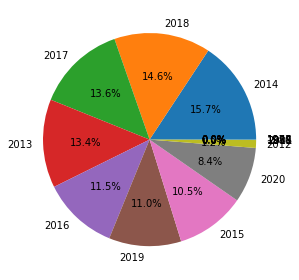

In [245]:
col = df["anoEdital"]
values = col.value_counts()
print(values)
_, ax = plt.subplots()
ax.pie(values, labels=values.keys(), autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# Coluna - Sigla Licitante

SES        2792
CAESB      1762
NOVACAP     828
SEPLAN      721
DER-DF      641
           ... 
SEPE          1
SINESP        1
BELACAP       1
ARPDF         1
TJDF          1
Name: siglaLicitante, Length: 76, dtype: int64


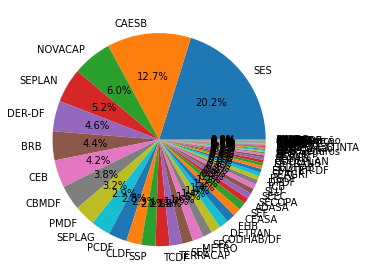

In [341]:
col = df["siglaLicitante"]
values = col.value_counts()
print(values)
_, ax = plt.subplots()
ax.pie(values, labels=values.keys(), autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# Coluna - Nome Licitante

In [247]:
col = df["nomeLicitante"]
print(col.value_counts())

Secretaria  de Estado de Saúde do Distrito Federal                         2792
Companhia de Saneamento do Distrito Federal                                1762
Companhia Urbanizadora da Nova Capital do Brasil                            828
Sec. de Estado de Planejamento e Orçamento                                  721
Departamento de Estrada de Rodagem                                          641
                                                                           ... 
Secretaria de Estado de Projetos Especiais do Distrito Federal                1
Secretaria de Estado de Governo do Distrito Federal                           1
Tribunal de Justiça do Distrito Federal                                       1
Serviço de Ajardinamento e Limpeza Urbana do DF                               1
Secretaria de Estado de Cultura e Economia Criativa do Distrito Federal       1
Name: nomeLicitante, Length: 78, dtype: Int64


# Coluna - Data Publicacao

In [279]:
df["dtPublicacao"].head()

0   2013-03-05
1   2013-03-01
2   2013-03-04
3   2013-03-04
4   2013-04-01
Name: dtPublicacao, dtype: datetime64[ns]

# Coluna - Numero DODF

In [278]:
df["nrDodf"].head()

0    46
1    44
2    45
3    45
4    66
Name: nrDodf, dtype: Int64

# Coluna - Ano DODF

2014    2223
2018    2000
2017    1885
2013    1832
2016    1598
2019    1572
2015    1409
2020    1198
2012     122
1951       2
2026       1
2030       1
2029       1
2011       1
2010       1
2005       1
1994       1
1991       1
1968       1
1963       1
1959       1
2044       1
Name: anoDodf, dtype: int64


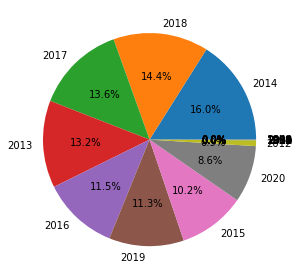

In [250]:
col = df["anoDodf"]
values = col.value_counts()
print(values)
_, ax = plt.subplots()
ax.pie(values, labels=values.keys(), autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# Coluna - Data de Abertura

In [277]:
df["dtAbertura"].head()


0    2013-04-09 00:00:00
1    2013-03-15 00:00:00
2    2013-03-14 00:00:00
3    2013-04-04 00:00:00
4    2013-04-15 00:00:00
Name: dtAbertura, dtype: object

# Coluna - Modalidade da Licitação

PREG?O ELETR?NICO                           8367
REGISTRO DE PREÇOS (PREGÃO ELETRÔNICO)      4250
CONCORRÊNCIA                                 667
PREGÃO PRESENCIAL                            327
REGISTRO DE PREÇOS (PREGÃO PRESENCIAL)        47
TOMADA DE PREÇOS                              30
PRÉ-QUALIFICAÇÃO (CONCORRÊNCIA)               16
CONCORRÊNCIA TÉCNICA E PREÇO                   7
REGIME DIFERENCIADO DE CONTRATAÇÕES (RDC       6
CONCORRÊNCIA MELHOR TÉCNICA                    3
Name: modalidadeLicitacao, dtype: int64


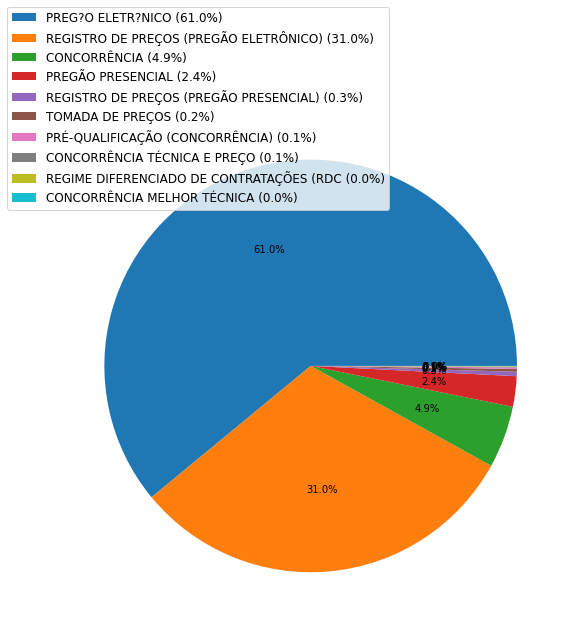

In [338]:
col = df["modalidadeLicitacao"]
values = col.value_counts()
print(values)
_, ax = plt.subplots(figsize=(8,14))
patches, texts, label_v = ax.pie(values, autopct='%1.1f%%')
labels = [str(values.keys()[i])+" ("+ val.get_text() +")" for i, val in enumerate(label_v)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.tight_layout()
plt.show()

# Coluna - Valor Estimado

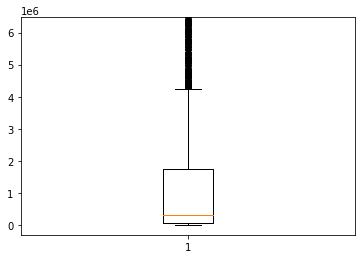

In [309]:
col = df["vrEstimado"]
_, ax = plt.subplots()
col = col.dropna()
ax.boxplot(col.values,notch=False, sym='+', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)
scale_factor = .001
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.show()

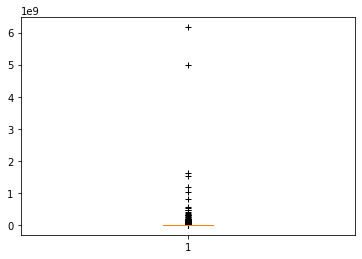

In [310]:
_, ax = plt.subplots()
col = col.dropna()
ax.boxplot(col.values,notch=False, sym='+', vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None)
        
plt.show()

# Coluna - Prazo

In [31]:
col = df["prazo"]
col.head()

0     270
1      12
2    <NA>
3    <NA>
4      12
Name: prazo, dtype: Int64

# Coluna - Prazo Abertura

In [32]:
col = df["prazoAbertura"]
col.head()

0    24
1    10
2     8
3    22
4     9
Name: prazoAbertura, dtype: Int64

# Coluna - Tipo do Prazo

DIAS     13689
MESES      183
Name: tpPrazo, dtype: int64


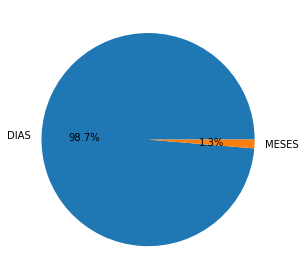

In [33]:
col = df["tpPrazo"]
values = col.value_counts()
print(values)
_, ax = plt.subplots()
ax.pie(values, labels=values.keys(), autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# Coluna - Ementa Objeto

In [271]:
col = df["ementaObj"]
df["ementaObj"].head()

0                LIMPEZA BR-060 SAMAMBAIA
1         AQUISIÇÃO BANCO DE DADOS ORACLE
2            CONTRATAÇÃO MINISTRAR CURSOS
3    COBERTURAS DE QUADRAS POLIESPORTIVAS
4                   CAPACITAÇÃO FUNCIONAL
Name: ementaObj, dtype: string

# Coluna - Descrição do Objeto

In [272]:
col = df["descObjeto"]
df["descObjeto"].head()

0    AVISO DE LICITAÇÃO
Concorrência nº 04/2013 AS...
1    Aquisição de infraestrutura de servidores
des...
2    Contratação por demanda de empresa especializa...
3    CONCORRÊNCIA Nº 10/2012.
A COMISSÃO PERMANENT...
4    Contratação de serviços de entidade sem fins l...
Name: descObjeto, dtype: string

### Indentificação de expressões inciais dos paragrafos de licitação

In [282]:
import re
import unicodedata

comum_begin = [
    'AVISO DE ABERTURA',
    'AVISO ABERTURA',
    'AVISO DE LICITAÇÃO',
    'AVISOS DE LICITAÇÃO',
    'AVISO DE LICITAÇÕES',
    'AVISOS DE LICITAÇÕES',
    'AVISO DE NOVA LICITAÇÃO',
    'PEGRÃO ELETRÔNICO',
    'PREGÃO',
    'LICITAÇÃO',
    'AVISO DE CONCORRÊNCIA',
    'CONCORRÊNCIA',
]

do_not_match = []
found = False
df_begin = ""
error = 0
for index, row in df.iterrows():
    for begin in comum_begin:
        try:
            df_begin = " ".join(row["descObjeto"].split()[:7])       
        except Exception as e:
            error += 1
            pass
        if begin.lower() in df_begin.lower():
            found = True

    if not found:
        do_not_match.append(df_begin)
    found = False

print(f"Não se inicia: {len(do_not_match) + error}")
print(f"Total de licitações: {len(df)}")
print(f"{(len(do_not_match) + error) / len(df)*100:.2f}%", end=" ")
print(f"Não se inicia com nenhuma das expressões de comum_begin")
# cosine_similarity(df["descObjeto"].str.extract(r'^AVISO DE(.*)$', re.MULTILINE).values)

Não se inicia: 275
Total de licitações: 13872
1.98% Não se inicia com nenhuma das expressões de comum_begin


# Coluna - Numero GDF

In [274]:
col = df["autuado"]
df["autuado"].head()

0    NÃO
1    NÃO
2    NÃO
3    NÃO
4    NÃO
Name: autuado, dtype: category
Categories (2, object): [NÃO, SIM]

# Coluna - Ano GDF

2014    435
2013     61
2015     11
2012      8
2011      2
2010      2
2031      1
2020      1
2009      1
2008      1
2007      1
1960      1
Name: anogdf, dtype: int64


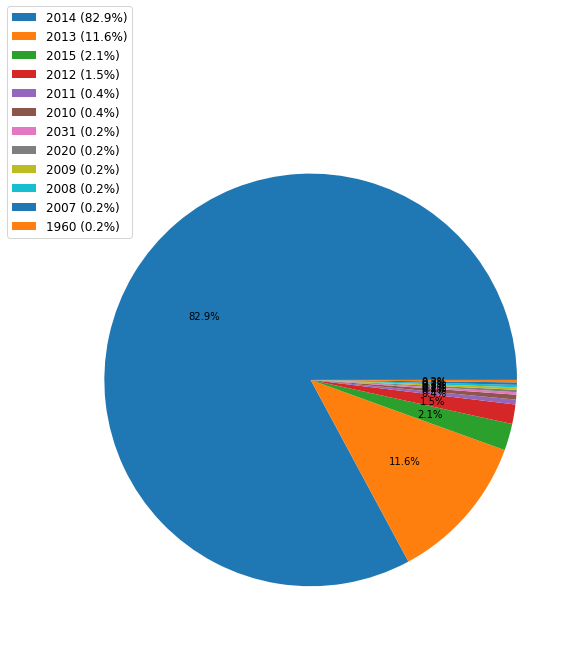

In [340]:
col = df["anogdf"]
values = col.value_counts()
print(values)
_, ax = plt.subplots(figsize=(8,14))
patches, texts, label_v = ax.pie(values, autopct='%1.1f%%')
labels = [str(values.keys()[i])+" ("+ val.get_text() +")" for i, val in enumerate(label_v)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.tight_layout()
plt.show()

# Coluna - Classificacao do Objeto

AQUISIÇÃO (OUTROS)                                   6775
SERVIÇOS (OUTROS)                                    3410
AQUISIÇÃO DE MEDICAMENTOS E PRODUTOS HOSPITALARES    2033
OBRA DE ENGENHARIA (OUTROS)                           282
SERVIÇOS DE ENGENHARIA (OUTROS)                       225
AQUISIÇÃO DE EQUIPAMENTOS TI / SOFTWARE               199
SERVIÇOS DE MANUTENÇÃO (MÁQ/EQUIPAMENTOS)             172
AQUISIÇÃO DE VEÍCULOS                                 146
SERVIÇOS DE TECNOLOGIA DA INFORMAÇÃO                  132
LOCAÇÃO (OUTROS)                                       94
SERVIÇOS DE MANUTENÇÃO (VEÍCULOS)                      54
OBRA CONSTRUÇÃO PREDIAL                                46
SERVIÇOS DE MANUTENÇÃO (PREDIAL)                       41
SERVIÇOS DE CONSULTORIA                                37
SERVIÇOS DE CONSERVAÇÃO (MAO DE OBRA)                  36
OBRA DE SANEAMENTO                                     32
LOCAÇÃO DE VEÍCULOS                                    31
SERVIÇOS DE VI

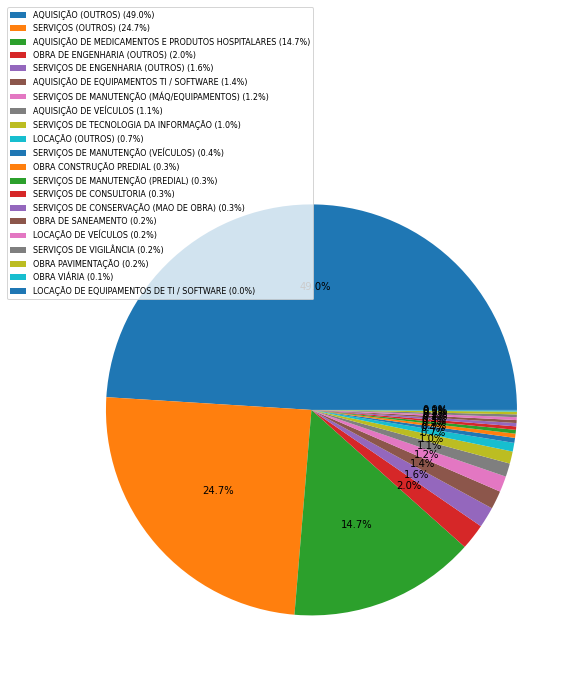

In [332]:
col = df["classifObjeto"]
values = col.value_counts()
print(values)
_, ax = plt.subplots(figsize=(8,14))
patches, texts, label_v = ax.pie(values, autopct='%1.1f%%')
labels = [values.keys()[i]+" ("+ val.get_text() +")" for i, val in enumerate(label_v)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.tight_layout()
plt.show()